In [ ]:
import pandas as pd
import numpy as np
pd.__version__

'1.1.5'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/noshowappointments.csv")


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

# Is there any Gender difference in having a patient be with status Show / No-Show

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df[df.Gender=="M"]["No-show"].value_counts(normalize=True)

No     0.800321
Yes    0.199679
Name: No-show, dtype: float64

In [ ]:
df[df.Gender=="F"]["No-show"].value_counts(normalize=True)

No     0.796854
Yes    0.203146
Name: No-show, dtype: float64

In [ ]:
male_show = df[df.Gender=="M"]["No-show"].value_counts(normalize=True)
female_show = df[df.Gender=="F"]["No-show"].value_counts(normalize=True)
x_graph_data = [male_show["Yes"], male_show["No"], female_show["Yes"], female_show["No"]]
x_graph_labels = ["M-Yes", "M-No", "F-Yes", "F-No"]

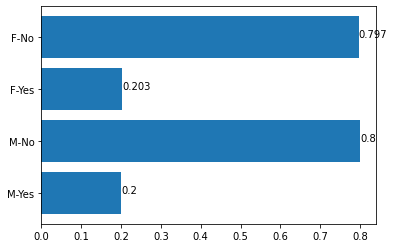

In [ ]:
import matplotlib.pyplot as plt
plt.barh(x_graph_labels, x_graph_data)

for index, value in enumerate(x_graph_data):
    plt.text(value, index, str(value.round(3)))

plt.show()

In [ ]:
# No Major Difference. 

# Is there any Age difference in having a patient be with status Show / No- Show?

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
ri.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [ ]:
ri.loc[ri.Age==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
# considering Age -1 , pregnant baby checkup 

In [ ]:
df[df["No-show"]=="Yes"].groupby("No-show").Age.value_counts(normalize=True).sort_index()

No-show  Age
Yes      0      0.028630
         1      0.018594
         2      0.011291
         3      0.012411
         4      0.012635
                  ...   
         95     0.000269
         96     0.000045
         97     0.000090
         98     0.000045
         115    0.000134
Name: Age, Length: 100, dtype: float64

In [ ]:
df[df["No-show"]=="No"].groupby("No-show").Age.value_counts().sort_index()

No-show  Age 
No       -1         1
          0      2900
          1      1858
          2      1366
          3      1236
                 ... 
          98        5
          99        1
          100       4
          102       2
          115       2
Name: Age, Length: 104, dtype: int64

In [ ]:
# Since many age values are present, we can create age category columns 

In [ ]:
def age_category(x):
  start_range = (x%10)*10
  end_range = start_range + 9
  return f"{start_range}-{end_range}"

In [ ]:
df["age_category"] = df.Age.apply(age_category)

In [ ]:
# Now we can try to apply the same logic 

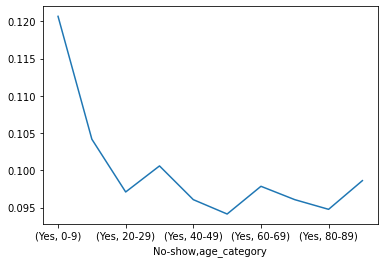

In [ ]:
df[df["No-show"]=="Yes"].groupby("No-show").age_category.value_counts(normalize=True).sort_index().plot()

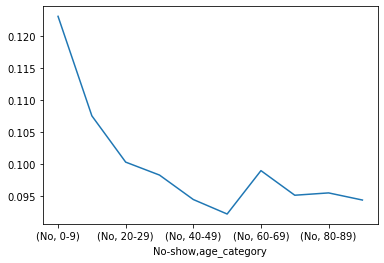

In [ ]:
df[df["No-show"]=="No"].groupby("No-show").age_category.value_counts(normalize=True).sort_index().plot()

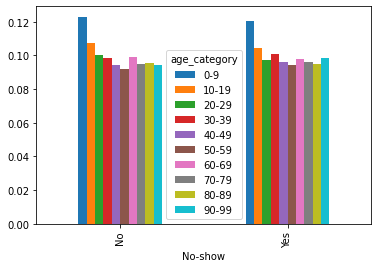

In [ ]:
df.groupby("No-show").age_category.value_counts(normalize=True).unstack().plot(kind='bar')

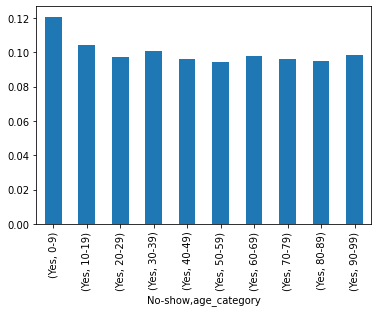

In [ ]:
df[df["No-show"]=="Yes"].groupby("No-show").age_category.value_counts(normalize=True).sort_index().plot(kind='bar')

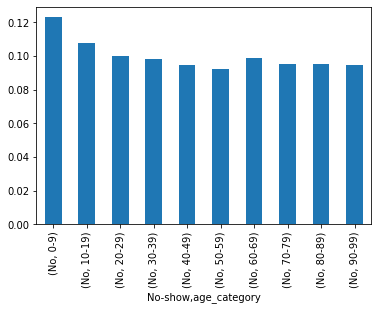

In [ ]:
df[df["No-show"]=="No"].groupby("No-show").age_category.value_counts(normalize=True).sort_index().plot(kind='bar')

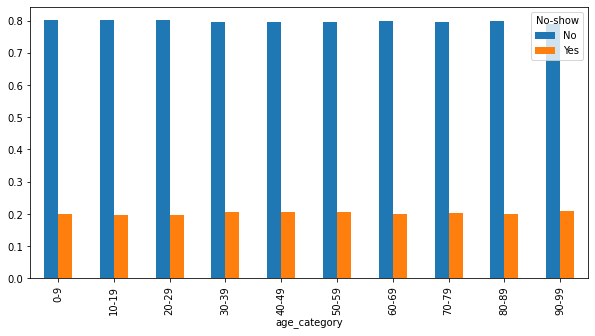

In [ ]:
df.groupby(df.age_category)["No-show"].value_counts(normalize=True).sort_index().unstack().plot(kind='bar', figsize=(10, 5))

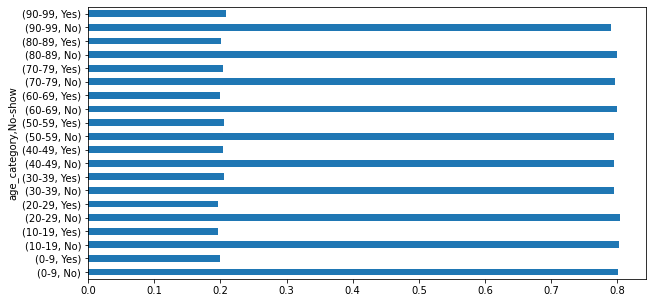

In [ ]:
df.groupby(df.age_category)["No-show"].value_counts(normalize=True).sort_index().plot(kind='barh', figsize=(10, 5))

In [ ]:
# In All age category, people who have shown is less than not shown. Almost Its Same for people who have shown and not shown 

## Is there any Age difference along with Gender difference with the status of Show / NoShow?

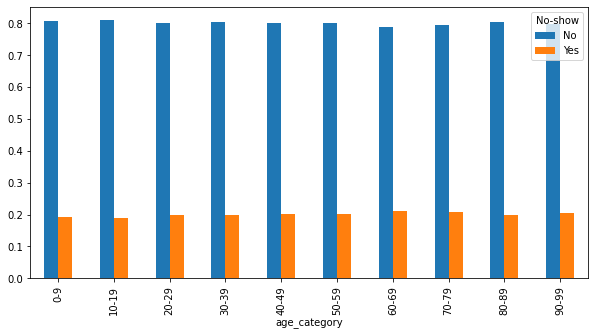

In [ ]:
df[df.Gender=="M"].groupby(df.age_category)["No-show"].value_counts(normalize=True).sort_index().unstack().plot(kind='bar', figsize=(10, 5))

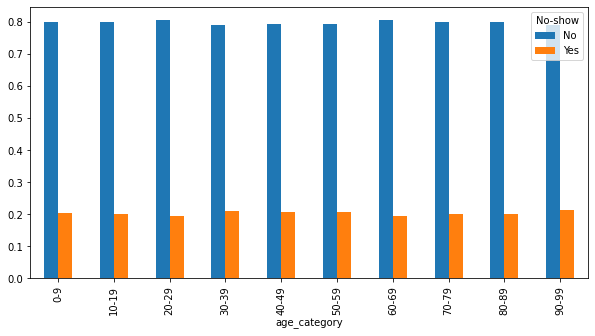

In [ ]:
df[df.Gender=="F"].groupby(df.age_category)["No-show"].value_counts(normalize=True).sort_index().unstack().plot(kind='bar', figsize=(10, 5))

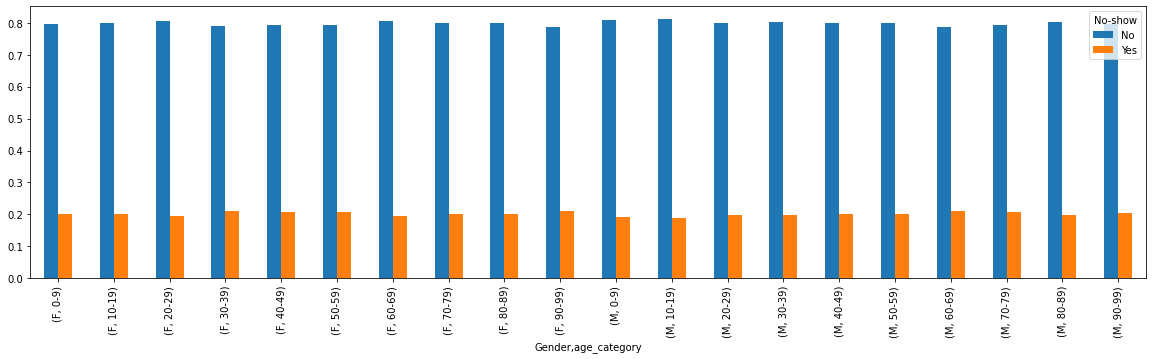

In [ ]:
df.groupby([df.Gender, df.age_category])["No-show"].value_counts(normalize=True).sort_index().unstack().plot(kind='bar', figsize=(20, 5))

In [ ]:
# Almost Same 


## On which weekday/day/month maximum appointments are getting finalized with Show status?

Week Day


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'age_category'],
      dtype='object')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,20-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,60-69
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,20-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,80-89
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,60-69


In [ ]:
df.ScheduledDay.isnull().sum()

0

In [ ]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

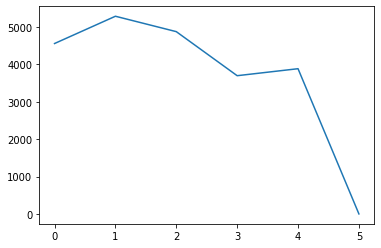

In [ ]:
df[df["No-show"] == "Yes"].ScheduledDay.dt.weekday.value_counts().sort_index().plot()

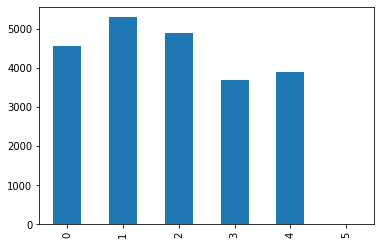

In [ ]:
df[df["No-show"] == "Yes"].ScheduledDay.dt.weekday.value_counts().sort_index().plot()

In [ ]:
x_graph_data = df[df["No-show"] == "Yes"].ScheduledDay.dt.weekday.value_counts().sort_index().values

In [ ]:
x_graph_data = np.append(x_graph_data, 0.0).tolist()

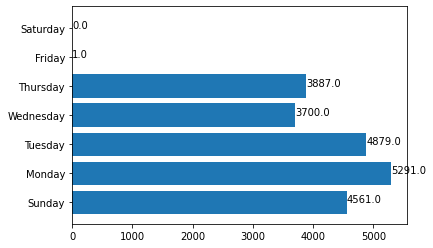

In [ ]:
import matplotlib.pyplot as plt
x_graph_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.barh(x_graph_labels, x_graph_data)

for index, value in enumerate(x_graph_data):
    plt.text(value, index, str(round(value, 5)))

plt.show()

Month

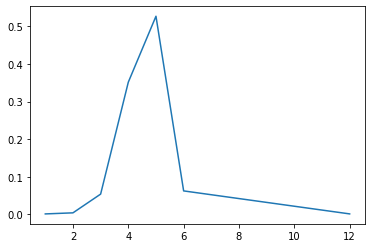

In [ ]:
df[df["No-show"] == "Yes"].ScheduledDay.dt.month.value_counts(normalize=True).sort_index().plot()

In [ ]:
month_data = df[df["No-show"] == "Yes"].ScheduledDay.dt.month.value_counts(normalize=True).sort_index()

In [ ]:
months = list(range(1, 13))

In [ ]:
month_dict = {}
for m, item in month_data.items():
  month_dict[m] = item

In [ ]:
month_show_yes = [month_dict.get(x, 0) for x in months]

In [ ]:
month_show_data = pd.DataFrame(
    { 'month' : months , 'show_yes' : month_show_yes })

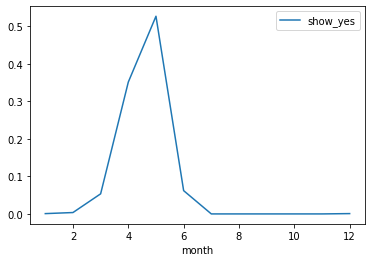

In [ ]:
month_show_data.plot("month", "show_yes")

DAY

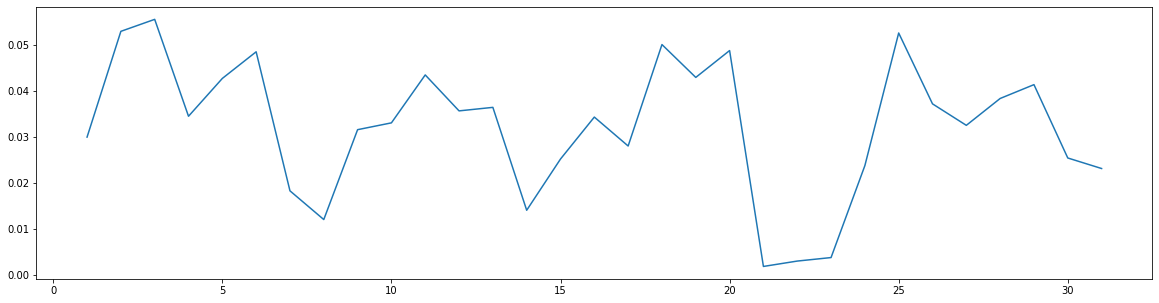

In [ ]:
df[df["No-show"] == "Yes"].ScheduledDay.dt.day.value_counts(normalize=True).sort_index().plot(figsize=(20, 5))

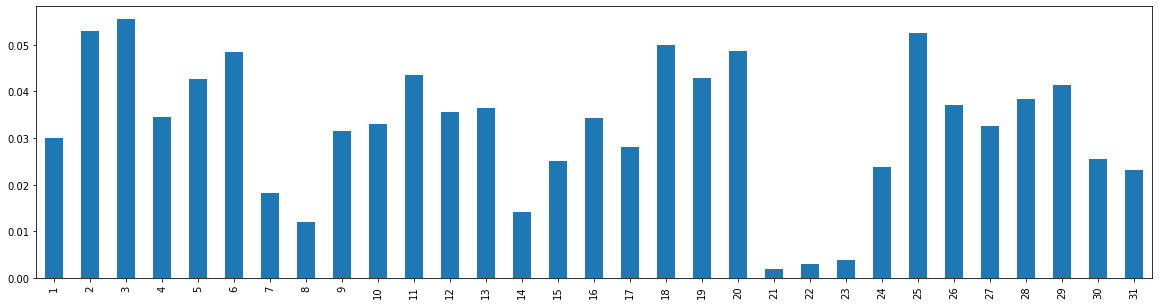

In [ ]:
df[df["No-show"] == "Yes"].ScheduledDay.dt.day.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(20, 5))

## 5. Is there any specific medical condition that is driving the patient(Male/Female) to go for the doctor's appointment?

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,20-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,60-69
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,20-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,80-89
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,60-69


In [ ]:
# We need to find the correlation between No-Show and All MEdical Condition

In [ ]:
df.Hipertension.isnull().sum()

0

In [ ]:
df.Diabetes.isnull().sum()

0

In [ ]:
df.Alcoholism.isnull().sum()

0

In [ ]:
df.Handcap.isnull().sum()

0

In [ ]:
df.Gender.isnull().sum()

0

In [ ]:
df["gender_binary"]  = df.Gender.replace({"M":1, "F":2})

In [ ]:
people_showing_up = df.loc[df["No-show"]=="Yes"]

In [ ]:
people_showing_up[["gender_binary", "Hipertension", "Diabetes", "Alcoholism", "Handcap"]].corr()
# Here correlation, gender_binary is high with Hipertension and Diabetes

,gender_binary,Hipertension,Diabetes,Alcoholism,Handcap
gender_binary,1.000000,0.047889,0.031517,-0.073959,-0.015154
Hipertension,0.047889,1.000000,0.439078,0.090336,0.085808
Diabetes,0.031517,0.439078,1.000000,0.016668,0.044351
Alcoholism,-0.073959,0.090336,0.016668,1.000000,-0.002903
Handcap,-0.015154,0.085808,0.044351,-0.002903,1.000000


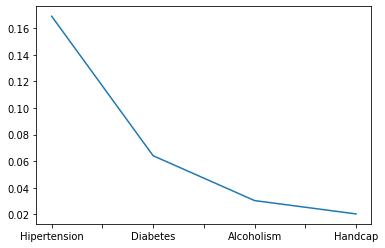

In [ ]:
people_showing_up[["Hipertension", "Diabetes", "Alcoholism", "Handcap"]].mean().plot()

In [ ]:
# Because of Hipertension and Diabetes people are showing up more 

## 6. Are the digital /social media reminders are helping the patients to take doctor's appointments?

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'age_category', 'gender_binary'],
      dtype='object')

In [ ]:
df.SMS_received.unique()

array([0, 1])

In [ ]:
df["no_show_binary"] = df["No-show"].replace({"Yes":1, "No":0})

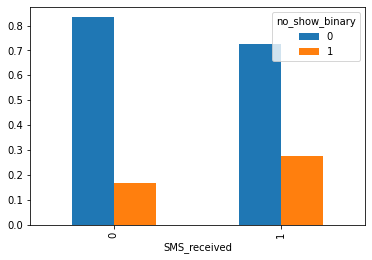

In [ ]:
df[["SMS_received", "no_show_binary"]].groupby("SMS_received").no_show_binary.value_counts(normalize=True).unstack().plot(kind='bar')

In [ ]:
# SMS helped them in a small way, as u can see from the corr below
df[["SMS_received", "no_show_binary"]].corr()

,SMS_received,no_show_binary
SMS_received,1.000000,0.126431
no_show_binary,0.126431,1.000000


## 7. Is Scholarship from the government helping patients for a good turnaround for physician visits?

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'age_category', 'gender_binary', 'no_show_binary'],
      dtype='object')

In [ ]:
df.Scholarship.unique()

array([0, 1])

In [ ]:
df[["Scholarship", "no_show_binary"]].groupby("Scholarship").no_show_binary.value_counts()

Scholarship  no_show_binary
0            0                 79925
             1                 19741
1            0                  8283
             1                  2578
Name: no_show_binary, dtype: int64

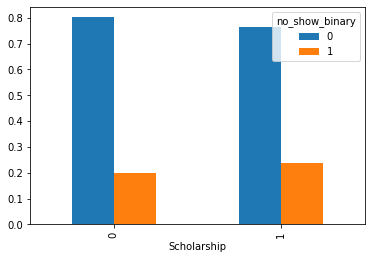

In [ ]:
df[["Scholarship", "no_show_binary"]].groupby("Scholarship").no_show_binary.value_counts(normalize=True).unstack().plot(kind='bar')

In [ ]:
df[["Scholarship", "no_show_binary"]].corr()

,Scholarship,no_show_binary
Scholarship,1.000000,0.029135
no_show_binary,0.029135,1.000000


In [ ]:
# Scholarship helped in a small way to show up 

## 8. Which neighborhood regions actually have higher appointments with physicians?

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'age_category', 'gender_binary', 'no_show_binary'],
      dtype='object')

In [ ]:
df.Neighbourhood.value_counts()[0:1]

JARDIM CAMBURI    7717
Name: Neighbourhood, dtype: int64

In [ ]:
# this is the neighbour with higher appointments with physcians

In [ ]:
df.loc[df["No-show"]=="Yes"].Neighbourhood.value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

In [ ]:
# even with who showed up, this is the neighbour with higher appointments with physcians

## 9. What factors are important for us to know in order to predict if a patient will show up for their scheduled time?

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'age_category', 'gender_binary', 'no_show_binary'],
      dtype='object')

In [ ]:
df["scheduled_week_day"] = df.ScheduledDay.dt.weekday

In [ ]:
new_df = df[["gender_binary", "scheduled_week_day", "Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received" ]]

In [ ]:
graph_data = new_df[df.no_show_binary == 1].corr()

In [ ]:
graph_data

,gender_binary,scheduled_week_day,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
gender_binary,1.000000,-0.023108,0.115420,0.123841,0.047889,0.031517,-0.073959,-0.015154,0.061197
scheduled_week_day,-0.023108,1.000000,-0.000706,-0.010258,-0.013774,-0.006091,0.010435,-0.007347,0.063417
Age,0.115420,-0.000706,1.000000,-0.079770,0.521557,0.306683,0.099859,0.081480,-0.016760
Scholarship,0.123841,-0.010258,-0.079770,1.000000,-0.023824,-0.024142,0.057870,-0.020870,0.015221
Hipertension,0.047889,-0.013774,0.521557,-0.023824,1.000000,0.439078,0.090336,0.085808,-0.026152
Diabetes,0.031517,-0.006091,0.306683,-0.024142,0.439078,1.000000,0.016668,0.044351,-0.030558
Alcoholism,-0.073959,0.010435,0.099859,0.057870,0.090336,0.016668,1.000000,-0.002903,-0.010413
Handcap,-0.015154,-0.007347,0.081480,-0.020870,0.085808,0.044351,-0.002903,1.000000,-0.029730
SMS_received,0.061197,0.063417,-0.016760,0.015221,-0.026152,-0.030558,-0.010413,-0.029730,1.000000


In [ ]:
# From the above relation, we find that Age, Hypirtensiom Diabetes were showing higher growth to show up 

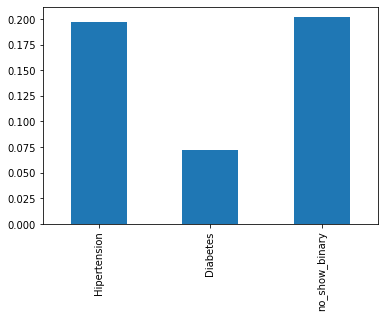

In [ ]:
df[["Hipertension", "Diabetes", "no_show_binary"]].mean().plot(kind='bar')

In [ ]:
graph_data.style.background_gradient(cmap='coolwarm')

,gender_binary,scheduled_week_day,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
gender_binary,1.000000,-0.023108,0.115420,0.123841,0.047889,0.031517,-0.073959,-0.015154,0.061197
scheduled_week_day,-0.023108,1.000000,-0.000706,-0.010258,-0.013774,-0.006091,0.010435,-0.007347,0.063417
Age,0.115420,-0.000706,1.000000,-0.079770,0.521557,0.306683,0.099859,0.081480,-0.016760
Scholarship,0.123841,-0.010258,-0.079770,1.000000,-0.023824,-0.024142,0.057870,-0.020870,0.015221
Hipertension,0.047889,-0.013774,0.521557,-0.023824,1.000000,0.439078,0.090336,0.085808,-0.026152
Diabetes,0.031517,-0.006091,0.306683,-0.024142,0.439078,1.000000,0.016668,0.044351,-0.030558
Alcoholism,-0.073959,0.010435,0.099859,0.057870,0.090336,0.016668,1.000000,-0.002903,-0.010413
Handcap,-0.015154,-0.007347,0.081480,-0.020870,0.085808,0.044351,-0.002903,1.000000,-0.029730
SMS_received,0.061197,0.063417,-0.016760,0.015221,-0.026152,-0.030558,-0.010413,-0.029730,1.000000
